# What Topics Should Candidates Address in Their 2020 Campaigns?

## *Agenda Setting for 2020 Presidential Candidates*

**Team of:** Atsumi Kainosho, Andrew Olson, Nikita Setia, Haley Townsend

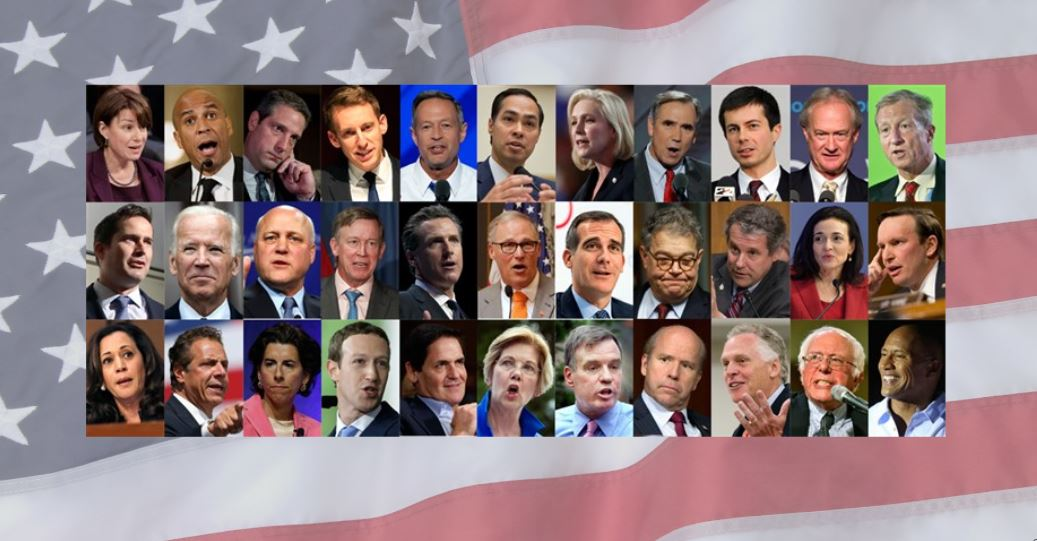

In [7]:
from IPython.core.display import Image 
Image(filename='images/intro_photo_candidates.jpg')
# image from: https://www.nbcnews.com/politics/elections/everyone-s-running-president-2020-n796116

Everyone is running for president in 2020. With so many people running, it’s important for candidates to identify issues early on that will help to differentiate them from the rest of pack and get voters to focus on their agenda. We aim to give 2020 presidential candidates food-for-thought as they prepare their winning campaign platforms. To get there, we will follow this agenda:

## AGENDA

1. Background and Policy Questions
2. Data Cleaning and Pre-Processing
3. Exploratory Data Analysis
4. Text Analysis: Unigrams and Bigrams
5. Topic Modeling
6. Sentiment Analysis
7. Clustering Using GMM
8. Conclusions and Recommendations
9. Challenges and Future Work
10. References


Below is a more well defined diagram of our work flow and methodology. 

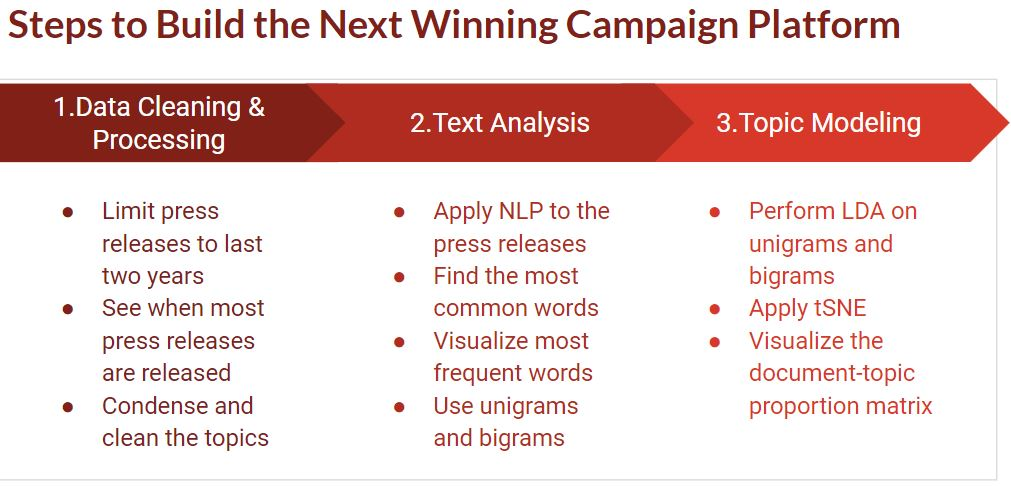

In [8]:
Image(filename='images/agenda_part1.jpg')

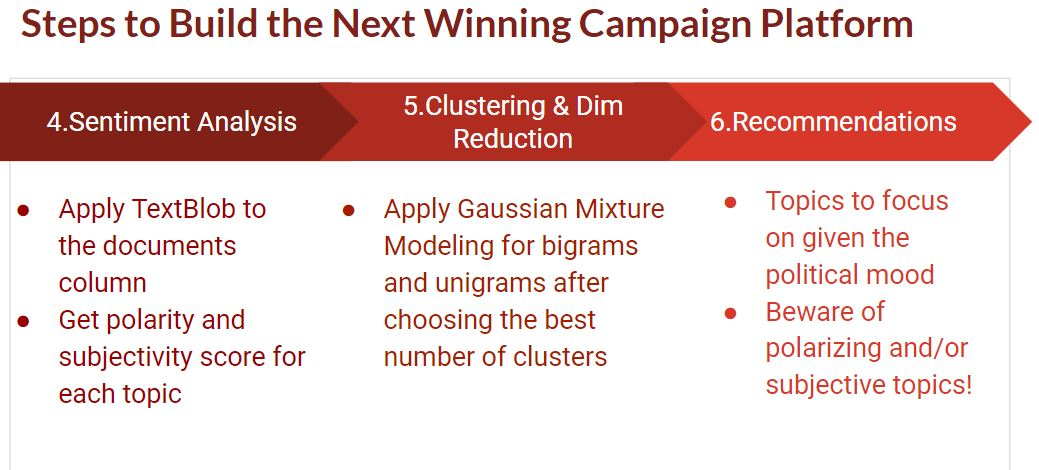

In [9]:
Image(filename='images/agenda_part2.jpg')

## (1) BACKGROUND AND POLICY QUESTIONS

In Harold Miller’s “Methods of Policy Analysis,” we learned that agenda-setting in public policy requires five main components: (1) a serious problem, (2) a triggering event, (3) an easily understood solution, (4) a political initiator or entrepreneur and (5) **the appropriate political mood**. Policymakers must leverage this “window of opportunity” to get their issues on the policy agenda. But this “window” can be difficult to forecast in advance. Therefore, we aim to better inform policymakers on the national stage about the current political atmosphere by analyzing press releases from the U.S. Department of Justice.  
 
The U.S. Department of Justice dispatches press releases nearly every day (or every few days) throughout the year. These press releases expose a wide variety of information about trials, hearings, convictions, sentences, etc. This information is relevant, not only on the national stage, but also at the state level. Sentencing laws are often used by local, state and federal candidates as part of their platforms for reform. These tens of thousands of press releases can shed light, not only on the bureaucracy's machinery, but also on national trends from the broader citizenry that are landing in the highest court.  
 
In addition to policymakers already holding office, candidates are announcing their bids for the 2020 U.S. presidential election. The races are likely to be tight within the two major parties and across them. Therefore, it is important that these candidates establish their platforms strategically so that they resonate with a wide subset of the public. In our analysis, we intend to dig deeper into the key topics hitting the Supreme Court and use this information to bolster candidates and policymakers in their races and initiatives, respectively.  

Our main policy questions include:
 - What topics have saturated press releases from the DOJ since the 2016 election?
 - What are the major topics and issues being discussed in the federal government right now, and how can can we (as analysts) used this information to better inform 2020 presidential candidates hoping to win the top office? 

## (2) DATA CLEANING AND PRE-PROCESSING

To begin, we will load the (MANY) necessary libraries. Then, we will view, subset, clean and prepare the data for the main analyses. First, we import the libraries and classes below.

In [1]:
# importing all required packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter
from operator import itemgetter
import calendar
import re
import spacy 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import calinski_harabaz_score
from sklearn.mixture import GaussianMixture

 The data are stored as a JSON file. Therefore, we use pandas and read_json to read in the file. 

In [2]:
# importing json into pandas dataframe structure
proj_df = pd.read_json('combined.json', lines=True)

# this is what our original json file looks like after importing
proj_df.head()

components  \
0            [National Security Division (NSD)]   
1  [Environment and Natural Resources Division]   
2  [Environment and Natural Resources Division]   
3  [Environment and Natural Resources Division]   
4  [Environment and Natural Resources Division]   

                                            contents                date  \
0  PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,... 2014-10-01 04:00:00   
1    WASHINGTON – North Carolina’s Waccamaw River... 2012-07-25 04:00:00   
2        BOSTON– A $1-million settlement has been... 2011-08-03 04:00:00   
3    WASHINGTON—A federal grand jury in Las Vegas... 2010-01-08 05:00:00   
4  The U.S. Department of Justice, the U.S. Envir... 2018-07-09 04:00:00   

        id                                              title         topics  
0     None       Convicted Bomb Plotter Sentenced to 30 Years             []  
1  12-919   $1 Million in Restitution Payments Announced t...             []  
2  11-1002  $1 Million Settlement Reached for Natural Reso...             []  
3   10-015  10 Las Vegas Men Indicted \r\nfor Falsifying V...             []  
4   18-898  $100 Million Settlement Will Speed Cleanup Wor...  [Environment]

In [3]:
# printing the shape of the file- there were originally 13,087 rows and 6 columns 
proj_df.shape

(13087, 6)

The entire dataset contains 13,087 rows and 6 columns. But we are only interested in the most recent press releases, since they are most relevant for presidential candidates. We are focusing only on the last two years (2017 and 2018). Below, we filter using the "date" column. We create a dataframe that only includes press releases from 2017 and 2018. This subsetted dataframe will be used throughout the project.

In [4]:
# Filter by the latest two years (2017 and 2018)
proj_df['date'] = pd.to_datetime(proj_df['date'])
df_1718 = proj_df[proj_df['date'].dt.year >= 2017]

# resetting the index of the subsetted dataframe for ease of use
new_index = list(range(2208))
df_1718 = df_1718.set_index([pd.Index(new_index)])

# here is the subsetted dataframe
df_1718.head()

components  \
0       [Environment and Natural Resources Division]   
1      [Criminal Division, USAO - Tennessee, Middle]   
2  [National Security Division (NSD), USAO - Cali...   
3  [National Security Division (NSD), USAO - Cali...   
4  [Environment and Natural Resources Division, U...   

                                            contents                date  \
0  The U.S. Department of Justice, the U.S. Envir... 2018-07-09 04:00:00   
1  A 62-count second-superseding indictment was r... 2018-03-08 05:00:00   
2  Federal authorities arrested Yi-Chi Shih, 62, ... 2018-01-23 05:00:00   
3  Federal authorities arrested Yi-Chi Shih, 62, ... 2018-01-23 05:00:00   
4  The United States Attorney’s Office for the Mi... 2017-12-14 05:00:00   

        id                                              title         topics  
0   18-898  $100 Million Settlement Will Speed Cleanup Wor...  [Environment]  
1   18-285  19 Members and Associates of Tennessee Mongols...             []  
2    18-78  2 Men Charged With Conspiring to Illegally Obt...             []  
3    18-78  2 Men Charged With Conspiring to Illegally Obt...             []  
4  17-1419  2017 Southeast Regional Animal Cruelty Prosecu...  [Environment]

Now, we have 2,208 rows and 6 columns. Next, we will condense the "topics" column so that there are only 21 topics in the dataset instead of 46. Subjective reasoning was used to condense these topics. We iteratively compared the topics and combined those that were similar. For example, there were many USAO offices listed as topics, so we combined them all into just 'USAO.' Later on, we will use this cleaned topics column to evaluate our performance on topic modeling and clustering. Essentially, this column will serve as our labels.

In [5]:
# creating our own customized "topics" column from the components column as topics had a lot of NAs
# these will be labels used to evaluate how well we do in topic modeling and clustering 
for i, j in enumerate(df_1718.iloc[:,0]):
    if 'USAO' in j[0]:
        df_1718.iloc[i,5] = ['USAO']
    elif 'Criminal' in j[0]:
        df_1718.iloc[i,5] = ['Criminal Division']
    elif 'Civil' in j[0]:
        df_1718.iloc[i,5] = ['Civil Rights']
    elif 'General' in j[0]:
        df_1718.iloc[i,5] = ['Office of the Attorney/Solicitor General']  
    elif 'Justice' in j[0]:
        df_1718.iloc[i,5] = ['Justice Division']
    elif 'Legal' in j[0]:
        df_1718.iloc[i,5] = ['Office of Victims (Crime/Violence)']
    elif 'Victims' in j[0]:
        df_1718.iloc[i,5] = ['Office of Victims (Crime/Violence)']
    else:
        df_1718.iloc[i,5] = [j[0]]

Since the original 'topics' column was so sparce, we created our own topic labels using the 'components' column. The 'topics' columns will be considered our true y labels. What we wish to do next is merge the 'contents' and 'title' columns to represent the content of each 'document.' The 'id' column will be disregarded as we do not believe it adds any value to our analysis.

In [6]:
# adding a new column called "documents" that includes both the content as well as the title 
# this will be used as our "documents"
df_1718['documents'] = df_1718["title"] + ' ' + df_1718["contents"] 

# printing the new table with the added columns we plan to use - topics and documents
df_1718.head()

components  \
0       [Environment and Natural Resources Division]   
1      [Criminal Division, USAO - Tennessee, Middle]   
2  [National Security Division (NSD), USAO - Cali...   
3  [National Security Division (NSD), USAO - Cali...   
4  [Environment and Natural Resources Division, U...   

                                            contents                date  \
0  The U.S. Department of Justice, the U.S. Envir... 2018-07-09 04:00:00   
1  A 62-count second-superseding indictment was r... 2018-03-08 05:00:00   
2  Federal authorities arrested Yi-Chi Shih, 62, ... 2018-01-23 05:00:00   
3  Federal authorities arrested Yi-Chi Shih, 62, ... 2018-01-23 05:00:00   
4  The United States Attorney’s Office for the Mi... 2017-12-14 05:00:00   

        id                                              title  \
0   18-898  $100 Million Settlement Will Speed Cleanup Wor...   
1   18-285  19 Members and Associates of Tennessee Mongols...   
2    18-78  2 Men Charged With Conspiring to Illegally Obt...   
3    18-78  2 Men Charged With Conspiring to Illegally Obt...   
4  17-1419  2017 Southeast Regional Animal Cruelty Prosecu...   

                                       topics  \
0  Environment and Natural Resources Division   
1                           Criminal Division   
2            National Security Division (NSD)   
3            National Security Division (NSD)   
4  Environment and Natural Resources Division   

                                           documents  
0  $100 Million Settlement Will Speed Cleanup Wor...  
1  19 Members and Associates of Tennessee Mongols...  
2  2 Men Charged With Conspiring to Illegally Obt...  
3  2 Men Charged With Conspiring to Illegally Obt...  
4  2017 Southeast Regional Animal Cruelty Prosecu...

## (3) EXPLORATORY DATA ANALYSIS

It is important to understand the data and its structure before diving into the complex methods. After reading in and transforming the data, we explored some of the characteristics of the dataset. First, we looked at the 21 topic labels we created and saw how often each appeared in the data. Since the frequency of their appearance dropped rather sharply after the first few topics, we cut off the histogram to just display the most common half. While we wanted to condense the topics further, we saw these 21 as distinct. Therefore, we stopped at 21 topics.

In [7]:
# listing all the topics in our subsetted dataset

for i,k in enumerate(set(df_1718['topics']),1):
    print(i,k)

1 Justice Division
2 Civil Rights
3 Office of Victims (Crime/Violence)
4 U.S. Trustee Program
5 Tax Division
6 Office of Public Affairs
7 Federal Bureau of Investigation (FBI)
8 Criminal Division
9 Office of the Attorney/Solicitor General
10 Federal Bureau of Prisons (BOP)
11 Asset Forfeiture Program
12 Environment and Natural Resources Division
13 USAO
14 Community Oriented Policing Services (COPS)
15 Antitrust Division
16 Bureau of Alcohol, Tobacco, Firearms and Explosives (ATF)
17 Drug Enforcement Administration (DEA)
18 Executive Office for Immigration Review
19 Office on Violence Against Women
20 Office of Information Policy
21 National Security Division (NSD)


These are the final 21 topics that we distilled down to from the original 46 in the messy data. We tried to condense further, but we thought these topics were distinct and should be preserved. 

Text(0, 0.5, 'Raw count')

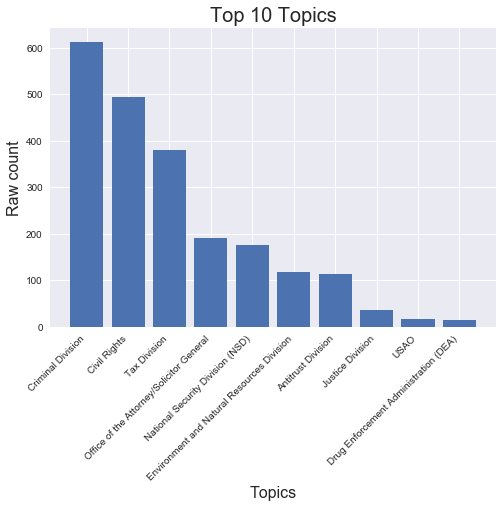

In [8]:
# Obtaining the frequency table for the topics that appears in our data
topic_counts = Counter()

for elem in df_1718['topics']:
    topic_counts[elem] += 1

# Sorting frequency table for histogram
sorted_topics = sorted(topic_counts.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# graphing the top topics
%matplotlib inline
plt.style.use('seaborn')

num_top_topics = 10
items = [item for item, count in sorted_topics[:num_top_topics]]
counts = [count for item, count in sorted_topics[:num_top_topics]]
plt.bar(range(num_top_topics), counts)
plt.xticks(range(num_top_topics), items, rotation=45, ha='right')
plt.title("Top 10 Topics", fontsize = 20)
plt.xlabel('Topics', fontsize = 16)
plt.ylabel('Raw count', fontsize = 16)

The top three topics regard the criminal division, civil rights and the tax division. These three topics are fairly broad in nature, so it is not too surprising that they come in at the top (by a fairly wide margin). We will keep this distribution in mind as we work with the unstructured data.

Next, we looked at how many press releases were released by the DOJ in each month and year. Looking at the initial summary statistics in the tables below, it appeared that there were many more press releases in 2017 and that there was a sharp drop off around the end of the year. After plotting the release dates into a time series histogram, it appears that the disparities observed were due to the dataset ending in July 2018 rather than because of any sudden shift in DOJ behavior. This graph also shows that the DOJ released between about 90 and 150 press releases each month.

In [9]:
# Seeing the distribution of press releases across months, and years
date_counts = Counter()
month_counts = Counter()
year_counts = Counter()

# Creates frequency tables for month, year,and month-year 
for elem in df_1718['date']:
    m = [elem.month, elem.strftime("%B")]
    y = elem.year
    m_y = m[1] + '-' + str(y)
    date_counts[m_y] += 1
    month_counts[m[0]] += 1
    year_counts[y] += 1

#sorts month table & prints results
sorted_months = sorted(month_counts.items(),
                      key=itemgetter(0))

print("Number of press releases by month")
for token, count in sorted_months:
    print(token, ":", count, 'press releases')
print('\n')

# Prints numbers of articles for each year
print("Number of press releases by year")
for item, count in list(year_counts.items()):
    print(item, ":", count, 'press releases')

Number of press releases by month
1 : 240 press releases
2 : 204 press releases
3 : 244 press releases
4 : 280 press releases
5 : 236 press releases
6 : 255 press releases
7 : 209 press releases
8 : 101 press releases
9 : 103 press releases
10 : 123 press releases
11 : 107 press releases
12 : 106 press releases


Number of press releases by year
2018 : 869 press releases
2017 : 1339 press releases


Next, we will take a look at the distribution of press releases by month-year. 

Text(0, 0.5, 'Raw count')

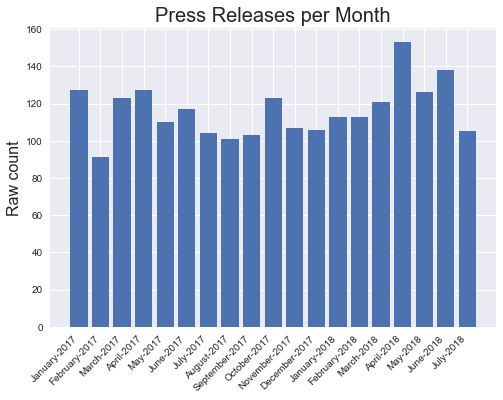

In [10]:
# Seeing the distribution of press releases across month and year combinations

# Sorting month-year list
m_y_list = []
date_list = list(date_counts.items())
sorted_indexes = [9, 11, 13, 16, 12, 17, 15, 10, 6, 5, 4, 3, 2, 14, 1, 8, 18, 7, 0]
for n in sorted_indexes:
    m_y_list.append(date_list[n])

#Graphing month-year histogram
items = [item for item, count in m_y_list]
counts = [count for item, count in m_y_list]
plt.bar(items, counts)
plt.xticks(range(len(m_y_list)), items, rotation=45, ha='right')
plt.title("Press Releases per Month", fontsize = 20)
plt.ylabel('Raw count', fontsize = 16)

April 2018 had the most press releases released. This was certainly a busy month for the DOJ. A few of the major events/discussions that occurred that month included: airstrikes against Syrian chemical-weapons facilities, major debates and announcements on immigration (especially at the U.S. southern border), tax evasion, sexual harrassment, tax fraud and evasion, heroin and fentanyl, and Chinese mail fraud. The press releases were numerous and varied during this top month.

## (4) TEXT ANALYSIS

It is time to begin our main analyses. We will start with text analysis using unigrams and bigrams. Before we can get there, we will prepare the press releases as a list of documents below. 

In [11]:
# merging 'title' and 'contents' 
documents_df = df_1718["documents"] 

# converting the df to a list to run topic modeling
documents_list = list(documents_df)

# confirming number of documents is 2208
len(documents_list)

2208

Now, we can use spacy to apply natural language processing (NLP) to the press releases. We will exclude punctuation, spaces and stop words from the mix. 

### Text Analysis: Unigrams

In [12]:
# creating an nlp instance
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])

raw_lemma_cts_nostop = Counter() # to count unigrams
all_tokens = [] # to note all tokens (will use later to get bigrams)

# counting the number of times each word appears in the corpus (2208 press releases) and build a frequency table.
for doc in documents_list:
    nlp_doc = nlp(doc)
    for token in nlp_doc:
        lemmas = token.lemma_.lower()
        if re.match('[a-zA-Z]+$', lemmas) and not (nlp.vocab[lemmas].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
            raw_lemma_cts_nostop[lemmas] += 1
            all_tokens.append(lemmas)

Now that we have performed natural language processing on the press releases using spacy, it's time to see which words appeared most frequently in the documents. 

In [13]:
# sorting the table 
sorted_cts = sorted(raw_lemma_cts_nostop.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# printing the top 50 most frequent words, their counts (frequencies) and ranks.
index = 1
for lem, count in sorted_cts[:50]:
    print("rank=", index, ' ', lem, ":", count)
    index += 1

rank= 1   attorney : 8978
rank= 2   department : 7443
rank= 3   district : 6269
rank= 4   division : 5781
rank= 5   justice : 5514
rank= 6   general : 4649
rank= 7   assistant : 4362
rank= 8   charge : 4117
rank= 9   office : 3952
rank= 10   criminal : 3853
rank= 11   tax : 3851
rank= 12   case : 3792
rank= 13   law : 3478
rank= 14   sentence : 3460
rank= 15   federal : 3384
rank= 16   fraud : 3292
rank= 17   acting : 3070
rank= 18   enforcement : 3031
rank= 19   guilty : 2995
rank= 20   today : 2933
rank= 21   united : 2815
rank= 22   states : 2704
rank= 23   court : 2640
rank= 24   year : 2562
rank= 25   prison : 2542
rank= 26   defendant : 2512
rank= 27   use : 2506
rank= 28   investigation : 2503
rank= 29   service : 2412
rank= 30   fbi : 2373
rank= 31   include : 2351
rank= 32   information : 2315
rank= 33   new : 2264
rank= 34   trial : 2253
rank= 35   pay : 2236
rank= 36   indictment : 2205
rank= 37   return : 2188
rank= 38   provide : 2156
rank= 39   state : 2127
rank= 40   age

Let's plot the top 20 words and their frequencies (raw counts) to get a better visual.

Text(0, 0.5, 'Raw Count')

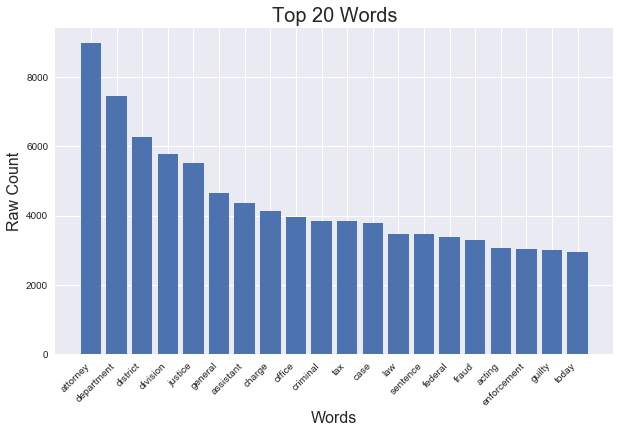

In [14]:
# plotting the top 20 unigrams and their frequencies

num_top_words = 20
items = [item for item, count in sorted_cts[:num_top_words]]
counts = [count for item, count in sorted_cts[:num_top_words]]

plt.figure(figsize=(10,6))
plt.bar(range(num_top_words), counts)
plt.xticks(range(num_top_words), items, rotation=45, ha='right')
plt.title("Top 20 Words", fontsize = 20)
plt.xlabel('Words', fontsize = 16)
plt.ylabel('Raw Count', fontsize = 16)

The top twenty unigrams across the 2017-18 DOJ press releases are shown above. They are not particularly illustrative or surprising. Tax is the eleventh most frequent unigram, which could be helpful information for candidates. Tax-related issues are always an important platform item. Otherwise, it is difficult to gain much information from this unigram text analysis. Let's see if we can gain any insight using bigrams instead.

### Text Analysis: Bigrams

In [15]:
# counting all bigrams
bigram_counter=Counter()

for i in list(range(len(all_tokens)-1)):
    bigram = " ".join(all_tokens[i:i+2])
    bigram_counter[bigram]+=1

In [16]:
# sorting the table
sorted_bigram_cts = sorted(bigram_counter.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# printing the top 50 most frequent bigrams, their counts (frequencies) and ranks
index = 1
for lem, count in sorted_bigram_cts[:50]:
    print("rank=", index, ' ', lem, ":", count)
    index += 1

rank= 1   attorney general : 3806
rank= 2   assistant attorney : 3432
rank= 3   justice department : 2771
rank= 4   united states : 2671
rank= 5   department justice : 1788
rank= 6   law enforcement : 1686
rank= 7   plead guilty : 1670
rank= 8   acting assistant : 1582
rank= 9   special agent : 1579
rank= 10   criminal division : 1532
rank= 11   new york : 1252
rank= 12   agent charge : 1134
rank= 13   tax return : 1118
rank= 14   tax division : 1113
rank= 15   eastern district : 1083
rank= 16   trial attorney : 976
rank= 17   southern district : 909
rank= 18   supervise release : 899
rank= 19   prosecute case : 896
rank= 20   attorney office : 850
rank= 21   year prison : 823
rank= 22   deputy assistant : 820
rank= 23   district court : 742
rank= 24   civil rights : 714
rank= 25   field office : 702
rank= 26   acting attorney : 702
rank= 27   health care : 681
rank= 28   rights division : 654
rank= 29   national security : 647
rank= 30   department criminal : 635
rank= 31   co conspir

Text(0, 0.5, 'Raw Count')

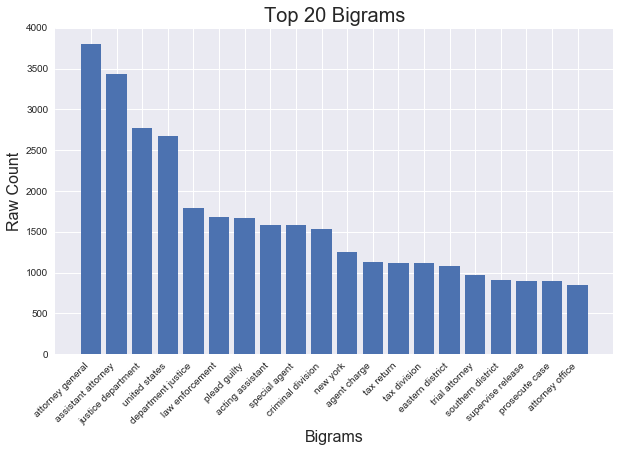

In [17]:
# plotting the top / most frequent bigrams
num_top_bigrams = 20
items = [item for item, count in sorted_bigram_cts[:num_top_bigrams]]
counts = [count for item, count in sorted_bigram_cts[:num_top_bigrams]]

plt.figure(figsize=(10,6))
plt.bar(range(num_top_bigrams), counts)
plt.xticks(range(num_top_bigrams), items, rotation=45, ha='right')
plt.title("Top 20 Bigrams", fontsize = 20)
plt.xlabel('Bigrams', fontsize = 16)
plt.ylabel('Raw Count', fontsize = 16)

Again, most of these two-words phrases are unsurprising. However, New York, Eastern District and Southern District suddenly appear in the mix. Again, tax makes a strong appearance in 13th and 14th respectively with tax return and tax division. We will keep these unigrams and bigrams in mind as we move into topic modeling. The text analysis presented above will serve as our launch point.

## (5) TOPIC MODELING

We will now perform topic modeling using the unigrams and bigrams. We will also visualize the topics in numerous ways. Finally, we will interpret these results. 

### Topic Modeling with Unigrams

In [18]:
# processing the unigrams using CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=50, stop_words='english') 
tf = tf_vectorizer.fit_transform(documents_list)

In [19]:
# here are the number of unique unigrams in our vocabulary
unique_vocabulary = list(tf_vectorizer.vocabulary_.keys())
print("The number of unique words in the vocabulary is:", len(unique_vocabulary)) 

The number of unique words in the vocabulary is: 1694


In [20]:
# using LDA for topic modeling with unigrams
num_topics = 10

# creating an LDA instance
lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=94775)

# fitting the unigram term-frequency matrix using LDA
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=94775, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [21]:
# confirming that we have 10 topics and 1694 words per topic
lda.components_.shape

(10, 1694)

In [22]:
# obtaining the distribution of words for each topic
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in lda.components_])

# printing the top 10 words per topic, for all 10 topics
num_top_words = 10

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

for topic_idx in range(num_topics):
    print('[Topic ', topic_idx, ']', sep='')
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print(tf_vectorizer.get_feature_names()[word_idx], ':', round(topic_word_distributions[topic_idx, word_idx]*100,4),"%")
    print()

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
immigration : 4.1489 %
general : 2.915 %
states : 2.3341 %
security : 2.2813 %
united : 2.1697 %
sessions : 1.9585 %
justice : 1.9308 %
ms : 1.6629 %
13 : 1.5526 %
law : 1.4212 %

[Topic 1]
drug : 2.127 %
enforcement : 1.5565 %
fraud : 1.2982 %
justice : 1.1467 %
said : 1.1245 %
western : 1.0674 %
antitrust : 1.04 %
drugs : 1.0289 %
district : 0.9977 %
law : 0.932 %

[Topic 2]
child : 2.9382 %
sexual : 2.4007 %
district : 1.9107 %
victims : 1.7772 %
justice : 1.6359 %
children : 1.5519 %
trafficking : 1.4258 %
case : 1.3663 %
pornography : 1.3058 %
exploitation : 1.2795 %

[Topic 3]
health : 2.9936 %
fraud : 2.4336 %
medicare : 2.3693 %
care : 2.0467 %
claims : 1.9286 %
services : 1.6592 %
million : 1.4197 %
office : 1.3738 %
false : 1.3028 %
general : 1.1389 %

[Topic 4]
district : 1.8597 %
criminal : 1.7293 %
guilty : 1.6286 %
division : 1.4546 %
assistant : 1.2991 %
case : 1.2565 %
office : 

We are thrilled by the results. We can clearly see distinct topics as follows:

 - Topic 0 refers to immigration issues, push factors such as gangs in Central American countries (i.e. MS13) and border security.
 - Topic 1 refers to drug issues and enforcement of drug laws. This topic likely correlates to Topic 0 on border security.
 - Topic 2 discusses sex trafficking and other sexual crimes.
 - Topic 3 is related to healthcare.
 - Topic 4 refers to crime more generally and the recent indictments around various groups (i.e. FBI).
 - Topic 5 corresponds to civil rights, justice and discrimination (perhaps housing specifically in some cases).
 - Topic 6 is again more general and discusses settlements.
 - Topic 7 refers to taxation, income and the IRS.
 - Topic 8 corresponds to harsh crimes involving prison sentences.
 - Topic 9 discusses law enforcement and clashes with civil rights.

### Visualizing the unigram topic modeling results in 2-D using t-SNE

We will plot the document-topic proportion matrix. To do so, we will use tSNE to bring the dimensionality of our results down to 2D. 

In [23]:
# transforming the unigram term-frequency matrix
# so now we have the matrix of 2208 documents by the 10 topics
doc_topic_distribs = lda.transform(tf)
doc_topic_distribs.shape 

(2208, 10)

In [24]:
# determining the which topic each document would have the highest probability of being assigned to 
prob_topic_assign = []
for app in doc_topic_distribs:
    prob = app.argmax()
    prob_topic_assign.append(prob)

In [25]:
# creating a tsne instance
tsne = TSNE(n_components=2, random_state=94775, init='pca', angle=0.99, n_iter=5000)  

# fitting and transforming the above created doc_topic_distribs data
doc_topic_prop_tsne_2d = tsne.fit_transform(doc_topic_distribs)

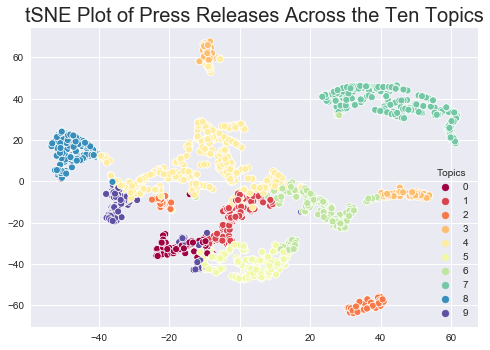

In [26]:
# plotting the 2-d representation of the our topic modeling results (unigrams) using tsne
ax = sns.scatterplot(x=doc_topic_prop_tsne_2d[:, 0], y=doc_topic_prop_tsne_2d[:, 1], hue=prob_topic_assign, legend="full",
                    palette="Spectral")
plt.legend(title="Topics")
plt.title("tSNE Plot of Press Releases Across the Ten Topics", fontsize = 20)
plt.show()

The image below overlays the main, distinct topics that we discovered. The topics that mix in the center of the plot are generally more broad and encompass crime and civil issues more generally. Therefore, it is not surprising that these topics are mixed in the middle. 

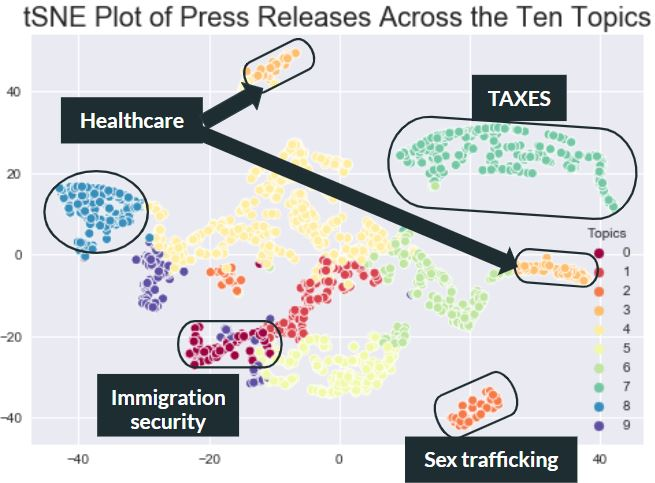

In [10]:
Image(filename='images/unigrams_topics.jpg')

Press releases most likely to fall in topic 2 appear to be easily clustered and separated from other topics. This is not surprising since this topic seems to clearly refer to sex trafficking and harassment. This topic is not as connected to other topics at all (dark orange). Additionally, topic 7 is pretty clearly separated from the other topics. This is also not surprising since it quite clearly refers to tax issues. Topic 3 also stands out, although in two separate areas of the plot. Topic 3 refers to health-related issues like Medicare. Finally, topic 8 is fairly distinct. This topic involves those crimes involving harsh prison sentences (such as those comitted by ISIS and gangs). The light blue topic at the far left is related to national security issues, but generally involves more egregious crimes like terrorism. 

Topic 9 seems to mix with other topics in the plot. This is not surprising either since it is a bit more general, encompassing law enforcement and rights. Similarly, topic 4 mixes with other topics. This topic is also more general and includes fraud and indictments.

### Topic Modeling with Bigrams

In [27]:
%%time

# processing the bigrams using CountVectorizer
tf_vectorizer_bigrams = CountVectorizer(max_df=0.95, min_df=50, stop_words='english', ngram_range=(2,2)) #set these based on LDA demo with news reports
tf_bigrams = tf_vectorizer_bigrams.fit_transform(documents_list)

Wall time: 2.87 s


In [28]:
# here are the number of unique bigrams in our vocabulary
unique_vocabulary_bigrams = list(tf_vectorizer_bigrams.vocabulary_.keys())
print("The number of unique words in the vocabulary is:", len(unique_vocabulary_bigrams)) #cool!

The number of unique words in the vocabulary is: 698


In [29]:
%%time

# using LDA for topic modeling with bigrams
num_topics = 10

# creating an LDA instance for bigrams
lda_bigrams = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=94775)

# fitting the bigram term-frequency matrix with LDA instance for bigrams
lda_bigrams.fit(tf_bigrams)

Wall time: 6.52 s


In [30]:
# obtaining the distribution of bigrams for each topic

topic_bigrams_distributions = np.array([topic_bigram_pseudocounts / np.sum(topic_bigram_pseudocounts)
                                     for topic_bigram_pseudocounts in lda_bigrams.components_])

# printing the top 10 bigrams per topic, for all 10 topics
num_top_bigrams = 10

print('Displaying the top %d bigrams per topic and their probabilities within the topic...' % num_top_bigrams)
print()

for topic_idx in range(num_topics):
    print('[Topic ', topic_idx, ']', sep='')
    sort_indices = np.argsort(topic_bigrams_distributions[topic_idx])[::-1]
    for rank in range(num_top_bigrams):
        bigram_idx = sort_indices[rank]
        print(tf_vectorizer_bigrams.get_feature_names()[bigram_idx], ':', round(topic_bigrams_distributions[topic_idx, bigram_idx]*100,4),"%")
    print()

Displaying the top 10 bigrams per topic and their probabilities within the topic...

[Topic 0]
united states : 4.5382 %
department justice : 3.0205 %
justice department : 2.9324 %
false claims : 2.6636 %
civil division : 2.4372 %
antitrust division : 2.2915 %
assistant attorney : 1.9637 %
attorney general : 1.7444 %
said acting : 1.7171 %
inspector general : 1.6912 %

[Topic 1]
criminal division : 4.1113 %
pleaded guilty : 2.2652 %
assistant attorney : 2.034 %
fraud section : 1.9162 %
special agent : 1.9091 %
agent charge : 1.8598 %
health care : 1.7272 %
southern district : 1.6442 %
department criminal : 1.5371 %
justice department : 1.5284 %

[Topic 2]
tax division : 4.4872 %
tax returns : 3.8193 %
assistant attorney : 3.2973 %
acting deputy : 2.7316 %
deputy assistant : 2.6483 %
attorney general : 2.5831 %
internal revenue : 1.5561 %
tax return : 1.5437 %
income tax : 1.4953 %
general goldberg : 1.465 %

[Topic 3]
police department : 2.3432 %
presumed innocent : 2.1194 %
assistant a

The topics, using bigrams, have changed quite dramatically. We can pick out the following:

 - Topic 0 refers to general issues/words found throughout the press releases, such as the United States and the Justic Department. This is not helpful to us. 
 - Topic 1 is a bit convoluted. It includes many general terms from the DOJ but also includes health care, fraud and southern district. 
 - Topic 2 clearly refers to tax-related issues. General Goldberg suddenly appears in the mix. This result probably corresponds to this press release (and others related to it): "Former IRS Revenue Officer and Owner of Tax Consulting Business Sentenced to Prison for Tax Evasion and Impeding the Tax Laws." 
 - Topic 3 is related to policing. South Carolina shows up in the top bigrams list. This is likely because a press conference was held in Columbia, SC on November 28, 2018. 
 - Topic 4, upon first glance, seems to refer to crime generally. However, natural resources shows up in the top bigrams (which is a new phrase). 
 - Topic 5 corresponds to civil rights mostly. 
 - Topic 6 seems to reference New York, national security and terrorism. These results likely to correspond to this press release: "New York Man Pleads Guilty To Attempting To Provide Material Support To ISIS." 
 - Topic 7 discusses Jeff Sessions almost exclusively. 
 - Topic 8 seems a bit mixed. It includes manditory minimum sentences and other sentencing issues but it also includes more tax-related phrases, such as tax returns and tax division. 
 - Topic 9 encompasses sexual harassment, abuse and pornography issues. 

### Visualizing the bigram topic modeling results in 2-D using t-SNE

In [31]:
# transforming the bigram term-frequency matrix
doc_topic_distribs_bigrams = lda_bigrams.transform(tf_bigrams)

In [32]:
# determining the which topic each document would have the highest probability of being assigned to 
prob_topic_assign_bigrams = []
for app in doc_topic_distribs_bigrams:
    prob = app.argmax()
    prob_topic_assign_bigrams.append(prob)

In [33]:
# creating tsne instance for bigrams data
tsne_bigrams = TSNE(n_components=2, random_state=94775, init='pca', angle=0.99, n_iter=5000)  

# fitting and transforming bigram data using the tsne instance
doc_topic_prop_tsne_2d_bigrams = tsne_bigrams.fit_transform(doc_topic_distribs_bigrams)

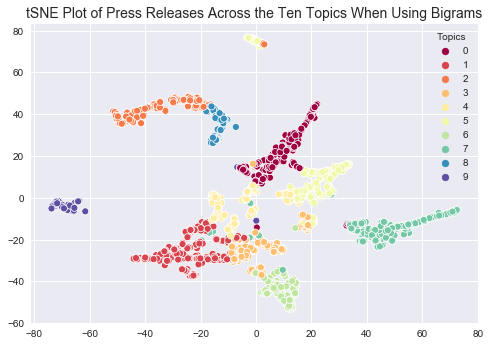

In [34]:
# plotting the 2-d representation of the our topic modeling results (bigrams) using tsne
ax_bigrams = sns.scatterplot(x=doc_topic_prop_tsne_2d_bigrams[:, 0], y=doc_topic_prop_tsne_2d_bigrams[:, 1], 
                             hue=prob_topic_assign_bigrams, legend="full", palette="Spectral")
plt.legend(title="Topics")
plt.title("tSNE Plot of Press Releases Across the Ten Topics When Using Bigrams", fontsize = 14)
plt.show()

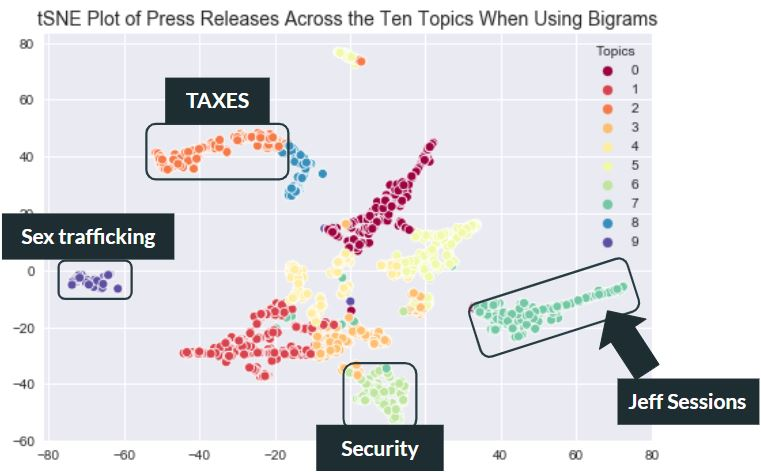

In [11]:
Image(filename='images/bigrams_topics.jpg')

Let's see if we can gain additional insight from the topic modeling that used bigrams. The plot above visualizes the results in 2D, after having applied tSNE to reduce the dimensionality. We can see the following:

Sexual harassment and abuse is still a distinct topic (topic 9) in purple. Topic 7, regarding Jeff Sessions, is quite distinct (topic 7). Topic 4, which refers to crime generally, mixes with the other topics and appears in pale yellow in the center of the plot. 

While topic 8 seemed convoluted in the top bigrams list above, it appears more distinct in the plot. 

Again, the main, distinct topics are sex trafficking, national security and taxes. Healthcare seems to fall out of the bigrams topics while Jeff Sessions appears. 

## (6) SENTIMENT ANALYSIS

Next, we did sentiment analysis using TextBlob. The sentiment property returns a named tuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. If the polarity is negative, it shows that content is negative. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. 


In [35]:
#Adding a column in the dataframe for the polarity and subjectivity
df_1718['polarity'] = df_1718['documents'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_1718['subjectivity'] = df_1718['documents'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

Text(0.5, 0, 'Topics')

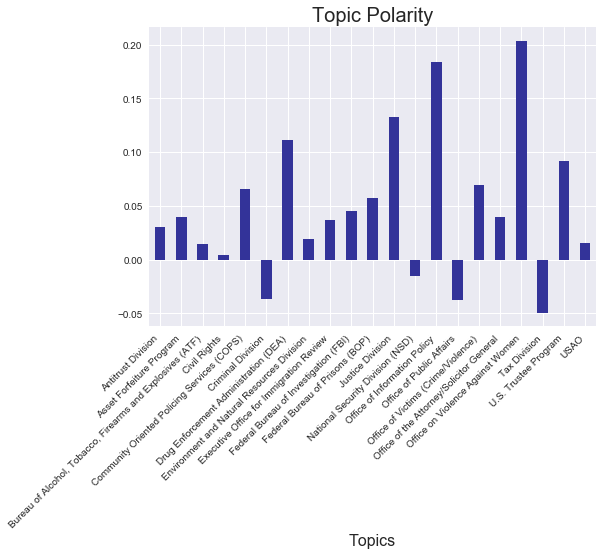

In [36]:
# plotting polarity
df_1718.groupby(df_1718.iloc[:,5])['polarity'].mean().plot.bar(cmap = 'terrain')
plt.xticks(rotation=45, ha='right')
plt.title("Topic Polarity", fontsize = 20)
plt.xlabel('Topics', fontsize = 16)

TextBlob's sentiment analysis is based on Natural Language Toolkit (NLTK) which store positive/negative words. The result of the analysis is affected by the ratio of number of positive/negative words in the data. The graph shows Office on Violence Against Women, Office of Information Policy, and Justice Division rank top 3 positive sentiment topics. That makes sense because in documents from these topics should contain lots of aggressive words such as "fight", "protect", or "justify". On the other hand, Tax Division, Office of Public Affars, and Criminal Division have negative nuance compared to other topics. That is also rational. Regarding releases from Tax Division might include words such as "decrease tax" or "cut". During the perioid we looked at, there were discussion about import tax hike, but the sentiment of topic is still negative. This suggests the number of releases regarding in-state tax is much bigger. In terms of Office of Public Arrairs and Criminal Division, contents they deal with should have negative aspects. Therefore, it is also understandable that these topics are negative in the result.

Text(0.5, 0, 'Topics')

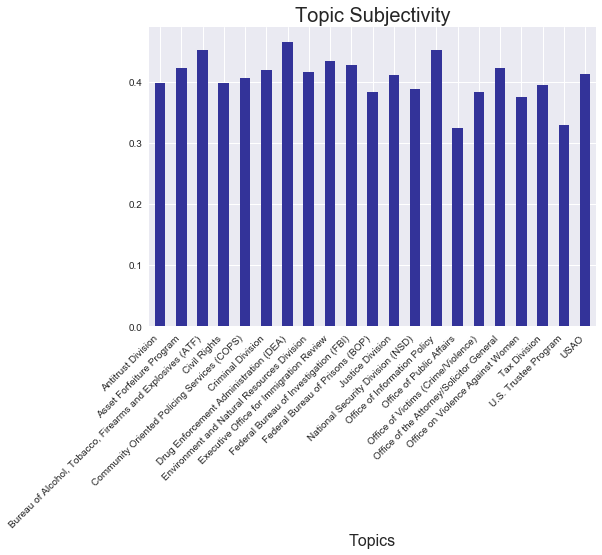

In [37]:
# plotting subjectivity
df_1718.groupby(df_1718.iloc[:,5])['subjectivity'].mean().plot.bar(cmap='terrain')
plt.xticks(rotation=45, ha='right')
plt.title("Topic Subjectivity", fontsize = 20)
plt.xlabel('Topics', fontsize = 16)

Then, we looked at subjectivity for each topic. Subjectivity is evaluated based on the number of opinion words that the data contains. Higher score shows a topic is more subjective. Since our data set is press releases from DOJ that is expected to be fair and neutral, all of the topics have less than 0.5 subjectivity. However, some topics such as Drug Enforcement Administration (DEA), Bureau of Alcohol, Tobacco, Firearms and Explosive (ATF), and Office of Information Policy have relatively high subjectivity. It is expected that these areas are still controversial, so releasees sometimes can be written from one perspective. On the othar hand, Office of Public Affairs and U.S. Trustee Program are considerably objective. 

## (7) CLUSTERING USING GMM

The final portion of our analysis will cluster unigrams and bigrams using Gaussian Mixture Modeling (GMM). We will choose the best number of clusters by selecting the value of k with the highest CH Index. Since this is not a binary classification task, we did not use F1-score and accuracy to determine the best number of clusters. Then, we will cluster the press releases using this number. Finally, we will look at the top topics in each cluster using the customized "topics" label in our data. 

### Clustering using Unigrams

In [38]:
# creating an instance of the vectorizer
# normalizing the data 
vectorizer = TfidfVectorizer(max_df=0.95, min_df=50, stop_words='english')

# using the instance to construct a normalized document matrix X
X = vectorizer.fit_transform(documents_list)
X = X.toarray()

We first normalized our unigram data. 

In [39]:
%%time

# running a loop to determine the best number of clusters for GMM
best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

# see which number of clusters has highest CH index
for k in range(2, 6):
    candidate_gmm = GaussianMixture(n_components=k, n_init=100, random_state=94775)
    candidate_gmm.fit(X)
    cluster_assignments = candidate_gmm.predict(X)
    score = calinski_harabaz_score(X, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments = cluster_assignments
    
print('Best k within 2, 3, ..., 5 according to CH index:', best_k)

k = 2 has CH index 37.66189397873128
k = 3 has CH index 76.4035913511691
k = 4 has CH index 59.383679405387795
k = 5 has CH index 52.58408849811402
Best k within 2, 3, ..., 5 according to CH index: 3
Wall time: 54min 54s


Based on the above loop, the k with the highest CH index (by a significant margin) is k=3. Therefore, we will use 3 clusters in our GMM. Please note that we did originally run this loop on a wider range of numbers; however, due to increasing computational time and having noticed that the best number of clusters is 3, we reduced this range. 

In [40]:
# fitting and predicting our normalized unigram data using the best number of clusters determined in the loop above
best_unigram_gmm = GaussianMixture(n_components=3, n_init=100, random_state=94775)
best_unigram_gmm.fit(X)
best_unigram_cluster_assignments = best_unigram_gmm.predict(X)

In [41]:
assignments = Counter()

# looping over each cluster assignment
# counting the number of assignments per cluster
for item in list(best_unigram_cluster_assignments):
        assignments[item] += 1 

# printing the number of documents assigned to each cluster
print("Cluster", "# of Documents")
for k, v in assignments.items(): 
    print(str(k).ljust(10), str(v))

Cluster # of Documents
2          875
0          957
1          376


Here is a breakdown of the number of documents assigned to each of the 3 clusters. Based on how small cluster number 1 looks (376), we are optimistic that this cluster may include a unique and comparable set of topics. 

In [42]:
# getting the indices of the original data for each of the clusters
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
cluster0 = get_indexes(0,best_unigram_cluster_assignments)
cluster1 = get_indexes(1,best_unigram_cluster_assignments)
cluster2 = get_indexes(2,best_unigram_cluster_assignments)

# counting the frequency of each topic within each cluster
comp_cluster0 = Counter()
comp_cluster1 = Counter()
comp_cluster2 = Counter()

for i in df_1718.loc[cluster0, "topics"]:
    comp_cluster0[i]+=1
        
for i in df_1718.loc[cluster1, "topics"]:
    comp_cluster1[i]+=1

for i in df_1718.loc[cluster2, "topics"]:
    comp_cluster2[i]+=1

# sorting the frequencies in descending order
sorted_cluster0 = sorted(comp_cluster0.items(),
                                  reverse=True,
                                  key=itemgetter(1))

sorted_cluster1 = sorted(comp_cluster1.items(),
                                  reverse=True,
                                  key=itemgetter(1))


sorted_cluster2 = sorted(comp_cluster2.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# printing the top 10 topics per cluster
print("Top 10 Topics in Cluster 0 (Unigrams):")
for k, v in sorted_cluster0[0:10]: 
    print(str(k).ljust(55), str(v))

print( )

print("Top 10 Topics in Cluster 1 (Unigrams):")
for k, v in sorted_cluster1[0:10]: 
    print(str(k).ljust(55), str(v))
    
print( )

print("Top 10 Topics in Cluster 2 (Unigrams):")
for k, v in sorted_cluster2[0:10]: 
    print(str(k).ljust(55), str(v))
    

Top 10 Topics in Cluster 0 (Unigrams):
Criminal Division                                       257
Civil Rights                                            208
Office of the Attorney/Solicitor General                181
National Security Division (NSD)                        163
Environment and Natural Resources Division              40
Justice Division                                        35
Drug Enforcement Administration (DEA)                   13
USAO                                                    12
Executive Office for Immigration Review                 11
Federal Bureau of Investigation (FBI)                   8

Top 10 Topics in Cluster 1 (Unigrams):
Tax Division                                            374
Asset Forfeiture Program                                2

Top 10 Topics in Cluster 2 (Unigrams):
Criminal Division                                       355
Civil Rights                                            285
Antitrust Division                                

Above are the top 10 topics in each of the clusters. As expected, cluster 1 has only two topics (Tax Division and Asset Forfeiture Program). This basically is the best and most defined cluster. However, the other two clusters appear to be a mix of topics, especially criminal- and civil-related topics.

### t-SNE to visualize clustering results for unigrams

In [43]:
# creating tsne instance
tsne = TSNE(n_components=2, random_state=94775, init='pca', angle=0.99, n_iter=5000)

# fitting and transforming normalized unigram tf matrix
X_tsne2d = tsne.fit_transform(X)

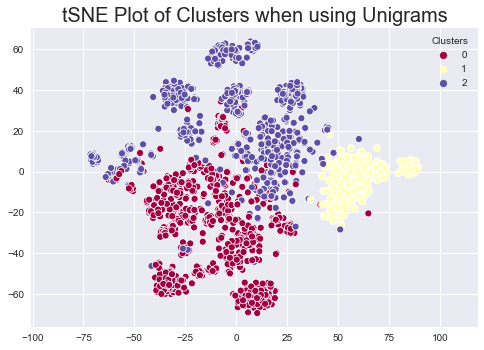

In [44]:
# plotting the 2-d representation of clustering results with unigrams
sns.scatterplot(X_tsne2d[:, 0], X_tsne2d[:, 1], hue=best_unigram_cluster_assignments, legend="full", palette="Spectral")
plt.legend(title="Clusters")
plt.title("tSNE Plot of Clusters when using Unigrams", fontsize = 20)
plt.axis('equal')
plt.show()

Next, we used tSNE to reduce our normalized unigram data into two dimensions in order to visualize our clustering results. The 2D representation after tSNE shows that cluster==1 is the most clearly separated from the other two. Cluster==0 & 2 are overlapped quite a bit whereas cluster==1 is off to the side on its own. This shows contents of tax are unique and easily separable. 

### Clustering using Bigrams

In [45]:
# creating an instance of the vectorizer
vectorizer_bigrams = TfidfVectorizer(max_df=0.95, min_df=50, stop_words='english', ngram_range=(2,2))

# using the instance to construct a document matrix X
X_bigrams = vectorizer_bigrams.fit_transform(documents_list)
X_bigrams = X_bigrams.toarray()

In [46]:
%%time

# running a loop to determine the best number of clusters for GMM
best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

# see which number of clusters has highest CH index
for k in range(2, 6):
    candidate_gmm = GaussianMixture(n_components=k, n_init=100, random_state=94775)
    candidate_gmm.fit(X_bigrams)
    cluster_assignments = candidate_gmm.predict(X_bigrams)
    score = calinski_harabaz_score(X_bigrams, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments_bigrams = cluster_assignments
    
print('Best k within 2, 3, ..., 5 according to CH index:', best_k)

k = 2 has CH index 80.52702158018487
k = 3 has CH index 102.7879218251784
k = 4 has CH index 88.12132612610755
k = 5 has CH index 79.64788098766651
Best k within 2, 3, ..., 5 according to CH index: 3
Wall time: 19min 54s


Next, we normalized our bigram data and ran the same loop as above to determine the best number of clusters for this data. As per the loop, the best number of clusters to use on the normalized bigram data is 3.

In [47]:
# fitting and predicting our normalized bigram data using the best number of clusters determined in the loop above
best_bigram_gmm = GaussianMixture(n_components=3, n_init=100, random_state=94775)
best_bigram_gmm.fit(X_bigrams)
best_bigram_cluster_assignments = best_bigram_gmm.predict(X_bigrams)

In [48]:
assignments_bigrams = Counter()

# looping over each cluster assignment
# counting the number of assignments per cluster
for item in list(best_bigram_cluster_assignments):
        assignments_bigrams[item] += 1 

# printing the number of documents assigned to each cluster
print("Cluster", "# of Documents")
for k, v in assignments_bigrams.items(): 
    print(str(k).ljust(10), str(v))

Cluster # of Documents
2          1034
1          795
0          379


Here is the breakdown of the number of documents in each of the 3 clusters. This looks somewhat similar to the breakdown when we used the normalized unigram data. In this case, we would assume that cluster==0 (with 379 documents) is going to be mainly tax related. However, we are interested to see if our bigram data does a better job of separating the other two clusters. 

In [49]:
# getting the indices of the original data for each of the clusters
cluster0_b = get_indexes(0,best_bigram_cluster_assignments)
cluster1_b = get_indexes(1,best_bigram_cluster_assignments)
cluster2_b = get_indexes(2,best_bigram_cluster_assignments)

# counting the frequency of each topic within each cluster
bigram_cluster0 = Counter()
bigram_cluster1 = Counter()
bigram_cluster2 = Counter()

for i in df_1718.loc[cluster0_b, "topics"]:
    bigram_cluster0[i]+=1
        
for i in df_1718.loc[cluster1_b, "topics"]:
    bigram_cluster1[i]+=1

for i in df_1718.loc[cluster2_b, "topics"]:
    bigram_cluster2[i]+=1

# sorting the frequencies 
sorted_bigram_cluster0 = sorted(bigram_cluster0.items(),
                                  reverse=True,
                                  key=itemgetter(1))

sorted_bigram_cluster1 = sorted(bigram_cluster1.items(),
                                  reverse=True,
                                  key=itemgetter(1))

sorted_bigram_cluster2 = sorted(bigram_cluster2.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# printing the top topics for each cluster using bigrams
print("Top 10 Topics in Cluster 0 (Bigrams):")
for k, v in sorted_bigram_cluster0[0:10]: 
    print(str(k).ljust(55), str(v))

print( )

print("Top 10 Topics in Cluster 1 (Bigrams):")
for k, v in sorted_bigram_cluster1[0:10]: 
    print(str(k).ljust(55), str(v))
    
print( )

print("Top 10 Topics in Cluster 2 (Bigrams):")
for k, v in sorted_bigram_cluster2[0:10]: 
    print(str(k).ljust(55), str(v))

Top 10 Topics in Cluster 0 (Bigrams):
Tax Division                                            377
Asset Forfeiture Program                                2

Top 10 Topics in Cluster 1 (Bigrams):
Criminal Division                                       599
National Security Division (NSD)                        165
USAO                                                    5
Office of the Attorney/Solicitor General                5
Antitrust Division                                      4
Asset Forfeiture Program                                4
Environment and Natural Resources Division              3
Federal Bureau of Investigation (FBI)                   3
Civil Rights                                            2
Justice Division                                        1

Top 10 Topics in Cluster 2 (Bigrams):
Civil Rights                                            491
Office of the Attorney/Solicitor General                186
Environment and Natural Resources Division              114
An

It does appear that it is better to use normalized bigram data for clustering. As expected, cluster==0 pertains mostly to taxes. What is unique in this situation, however, is that the other two clusters appear somewhat unique and separable. Cluster==1 appears to capture crime and national security-related topics. Whereas, cluster==2 appears to capture mostly civil-related topics. There may be some overlap, however, it is slight compared to the clustering results when using unigrams.

### t-SNE to visualize clustering results for bigrams

In [50]:
# creating t-sne instance
tsne_bigrams = TSNE(n_components=2, random_state=94775, init='pca', angle=0.99, n_iter=5000)

# fitting and transforming normalized bigram tf matrix
X_tsne2d_bigrams = tsne_bigrams.fit_transform(X_bigrams)

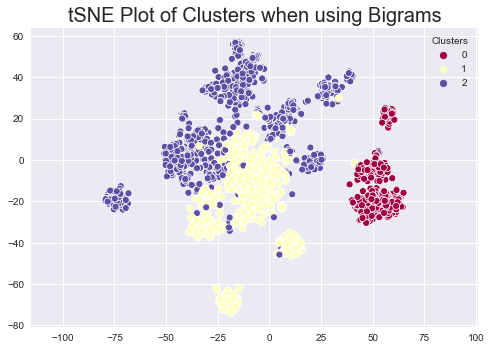

In [51]:
# plotting the 2-d representation of clustering results with bigrams
sns.scatterplot(X_tsne2d_bigrams[:, 0], X_tsne2d_bigrams[:, 1], 
                hue=best_bigram_cluster_assignments, legend="full", palette="Spectral")
plt.legend(title="Clusters")
plt.title("tSNE Plot of Clusters when using Bigrams", fontsize = 20)
plt.axis('equal')
plt.show()

Again, we reduced the normalized bigram data to 2 dimensions using tSNE to visualize our clustering results. This does appear to be visually better compared to the tSNE plot for the clustering results using unigram data. Expectedly, cluster==0 is separated from the other two clusters. Given what we saw in the topic breakdown above it is not surprising that the other two clusters appear to be more separated compared to when unigrams were used. There appears to be less overlap between clusters 1 and 2. 

## (8) CONCLUSIONS AND RECOMMENDATIONS

The findings based on our analysis is below.

- Tax has a unique feature. The number of press releases of tax ranks third. From text analysis of unigrams and bigrams, the word "tax" ranks at 11th for unigrams and "tax return" and "tax division" rank at 13th and 14th for bigrams, respectively. Based on topic modeling for unigrams and bigrams, one cluster apparently represents tax for both cases. 
- Based on topic modeling for unigrams, tax, healthcare, immigration/security, sex trafficking are distinguishable. From topic modeling for bigrams, tax, sex trafficking, security, and Jeff Sessions are clear clusters. 
- Office of Violence Against Women, Office of Information Policy, and Justice Division rank top 3 positive sentiment topics. Tax Division, Criminal Division, National Security Division, and Office of Public Affairs are negative.
- t-SNE for bigrams works better than t-SNE for unigrams.The clustering using bigrams shows that there are three distinguishable clusters in the documents contents. 1: Criminal Division and National Security Division (NSD), 2: Civil Rights, Office of the Attorney/Solicitor General, Environment and Natural Resources Division and Antitrust Division, and 3: Tax.

From these conclusions, we recommend the following:
 - Mention tax with your concrete stance as much as possible.
 - Since National security is a hot topic, understand your constituents and take an early and firm stance for the next election campaign.
 - Don’t overlook sexual harassment and healthcare.  
 - Mention at least one topic in each cluster using bigrams to show you have broad knowledge and opinion.
 
2020 presidential candidates should consider these topics when defining their platforms!

## (9) CHALLENGES AND FUTURE WORK

During this project our main challenges and obstacles included:
- Reading and working with JSON
- Topics had a lot of NAs (missing data). Plus, lots of topics.
- Had to condense the long list of components  to create topics 
- Formal government documents can lack opinion


Additionally, we did not have time to do everything we wanted to do. Therefore, future work might include:
- Incorporating more public opinion sources (e.g. comments, tweets)
- Zooming into specific states for particular candidates
- Combining unigrams and bigrams (or trying trigrams!) to make a more robust feature set

## (10) REFERENCES

The press releases are available for download at the following link from Kaggle: https://www.kaggle.com/jbencina/department-of-justice-20092018-press-releases​.

Thanks to guidance from: Dr. George Chen, Emaad Manzoor and David Pinski.